In [1]:
import time 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [97]:
data = [0]
t = [0]

In [98]:
def add_data_point(data, time, plot=True):
    start_time = 1724229830
    current_time = time.time()
    delta_time = (current_time-start_time)/3600
    n_jobs = 240
    out = open('out.txt').read()
    out_split = out.split()
    df_out = pd.DataFrame(data=out_split)
    # index = df_out[df_out[0] == 'rfc'].index[0]
    # df_trimmed = df_out.iloc[index:]
    solved_models = df_out.value_counts()['[CV]']
    print(f"Progress: {round(100*solved_models/n_jobs, 1)}%\n"
         
         )
    if delta_time - t[-1]>0.2:
        data.append(solved_models)
        t.append(delta_time)

    if plot:
        
        fig, ax = plt.subplots()

        plt.plot(t, data, marker='x', label='models solved')
        plt.axhline(y=n_jobs, color='red', label='total models')
        plt.xlabel('time (hours)')
        plt.ylabel('Models solved')
        plt.title('Progress of models grid search over time')
        plt.ylim(0, n_jobs*1.1)
        plt.legend()

    

In [99]:
def est_comp_time(data, t):
    slope = []
    n_jobs = 240
    
    for i in range(len(data)-1):
        slope.append((data[i+1]-data[i])/(t[i+1]-t[i]))
    avg_slope = np.average(slope)
    time_left = (n_jobs-data[-1])/avg_slope
    est_time = datetime.fromtimestamp(time_left*3600 + time.time())
    print("Estimated completion time:", est_time)

Progress: 70.4%

Estimated completion time: 2024-08-24 07:01:12.743278


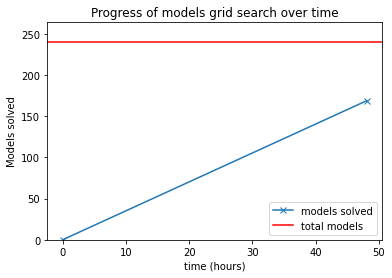

In [100]:
add_data_point(data, time, plot=True)
est_comp_time(data, t)

In [26]:
t, data

([0,
  7.012518567244212,
  7.255603783064418,
  9.543548785845438,
  12.025870856642722,
  13.381584204435349],
 [0, 357, 373, 475, 572, 614])